<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:200%;text-align:center;border-radius:15px 15px;">Model Training for Auto 2W Loan Approval</p>

#### 1.1 Import Data and Required Packages
##### Importing Basic, Preprocessing and Model Training Library.

In [27]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [28]:
df = pd.read_csv('data/credit_data.csv')

In [29]:
#dropping duplicate records
df = df.drop_duplicates()

In [30]:
# Treating missing values
df['Occupation'] = df['Occupation'].fillna('Others')

In [31]:
#Feature Engineering and Removing Very low cost vehicle data
df['TwoWheeler Cost'] = round((df['Loan Amount']/df['LTV Ratio'])*100,0)

df = df[df['TwoWheeler Cost']>=20000.0]

#### Preparing X and Y variables

In [33]:
X = df.drop(columns=['Profile Score'],axis=1)
y = df['Profile Score']

In [34]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [35]:
X = preprocessor.fit_transform(X)

In [37]:
#creating three sets - training, test and validation
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

#### Create an Evaluate Function to give all metrics after model Training

In [38]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [39]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 12.3279
- Mean Absolute Error: 10.0779
- R2 Score: 0.7466
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12.3439
- Mean Absolute Error: 10.1111
- R2 Score: 0.7423


Lasso
Model performance for Training set
- Root Mean Squared Error: 13.6895
- Mean Absolute Error: 11.0639
- R2 Score: 0.6875
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.6468
- Mean Absolute Error: 11.0468
- R2 Score: 0.6851


Ridge
Model performance for Training set
- Root Mean Squared Error: 12.3279
- Mean Absolute Error: 10.0779
- R2 Score: 0.7466
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12.3438
- Mean Absolute Error: 10.1111
- R2 Score: 0.7423


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 8.2973
- Mean Absolute Error: 6.0208
- R2 Score: 0.8852
-----------

/Users/kianathakkar/Documents/AutoLoanApproval/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 7.7444
- Mean Absolute Error: 6.0622
- R2 Score: 0.9000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.5188
- Mean Absolute Error: 6.6230
- R2 Score: 0.8773


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 8.0465
- Mean Absolute Error: 6.3276
- R2 Score: 0.8920
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.5444
- Mean Absolute Error: 6.6771
- R2 Score: 0.8765


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 10.4629
- Mean Absolute Error: 8.7933
- R2 Score: 0.8175
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.4948
- Mean Absolute Error: 8.8250
- R2 Score: 0.8137




### Results

In [41]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.923227
6,XGBRegressor,0.877280
7,CatBoosting Regressor,0.876540
4,Decision Tree,0.874572
3,K-Neighbors Regressor,0.822378
8,AdaBoost Regressor,0.813742
2,Ridge,0.742334
0,Linear Regression,0.742329
1,Lasso,0.685063


## Linear Regression

In [42]:
model = XGBRegressor()
xgb = model.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

/Users/kianathakkar/Documents/AutoLoanApproval/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


 Accuracy of the model is 87.73


## Plot y_pred and y_test

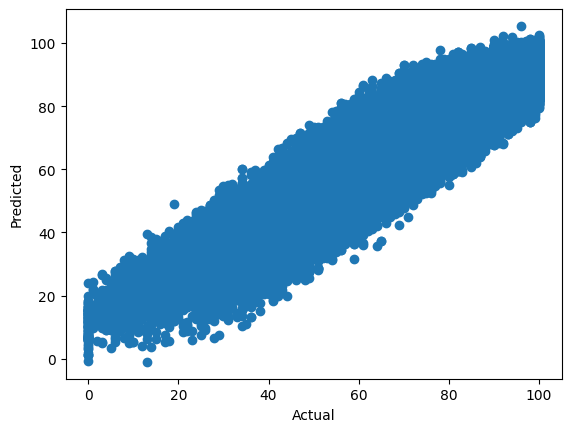

In [43]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

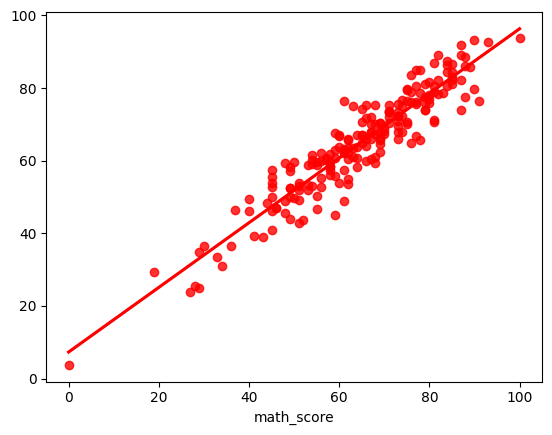

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [44]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
12365,96,97.100349,-1.100349
79571,77,65.192268,11.807732
67139,96,97.783485,-1.783485
236574,97,96.142494,0.857506
5911,70,75.338158,-5.338158
...,...,...,...
87653,100,95.268936,4.731064
81532,66,44.581066,21.418934
35233,100,98.520981,1.479019
155832,85,94.130646,-9.130646


In [52]:
print(y_train.shape)
print(type(y_train))
# Assuming you have X_train and y_train as NumPy arrays
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)

(106765,)
<class 'pandas.core.series.Series'>


In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# Convert the CSR matrix to a dense Numpy array
X_dense = X_train.toarray()

# Convert the Pandas Series to a Numpy array
Y_array = y_train.values

# Create a Keras Sequential model
model = Sequential()


# Add your layers here
model.add(Dense(128, activation='relu', input_shape=(X_dense.shape[1],), kernel_initializer=initializers.he_normal()))  # Add a hidden layer with 128 units and ReLU activation
model.add(Dense(64, activation='relu',kernel_initializer=initializers.he_normal()))  # Add another hidden layer with 64 units and ReLU activation
model.add(Dense(1, activation='linear',kernel_initializer=initializers.he_normal()))  # Output layer (linear activation)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_dense, Y_array, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
2670/2670 [==============================] - 2s 558us/step - loss: 258.5359 - val_loss: 81.0046
Epoch 2/30
2670/2670 [==============================] - 1s 540us/step - loss: 80.0592 - val_loss: 79.6366
Epoch 3/30
2670/2670 [==============================] - 1s 520us/step - loss: 79.4199 - val_loss: 81.8594
Epoch 4/30
2670/2670 [==============================] - 1s 522us/step - loss: 79.0643 - val_loss: 79.0308
Epoch 5/30
2670/2670 [==============================] - 1s 533us/step - loss: 78.6162 - val_loss: 84.2768
Epoch 6/30
2670/2670 [==============================] - 1s 535us/step - loss: 78.4226 - val_loss: 79.7001
Epoch 7/30
2670/2670 [==============================] - 1s 549us/step - loss: 78.1528 - val_loss: 79.1210
Epoch 8/30
2670/2670 [==============================] - 1s 523us/step - loss: 77.9265 - val_loss: 80.1944
Epoch 9/30
2670/2670 [==============================] - 1s 525us/step - loss: 77.7562 - val_loss: 78.4025
Epoch 10/30
2670/2670 [======================

In [67]:
X_test_dense = X_test.toarray()

# Make predictions
y_test_pred = model.predict(X_test_dense)

# Calculate RMSE for the test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R2 score for the test data
r2_test = r2_score(y_test, y_test_pred)

# Print the RMSE and R2 score for the test data
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"R2 Score (Test): {r2_test:.2f}")

1113/1113 [==============================] - 0s 422us/step
RMSE (Test): 8.87
R2 Score (Test): 0.87
